## Discovering impact of the Series 'Euphoria' through NLP
### Analysis based on posts and comments on the `r/euphoria` subreddit  

#### 2. EDA

Goal: Summarize main characteristics of dataset  
I: corpus and TDM  
O: trands in data if it makes sense  

Some ideas:  
- top words for each post
- vocabulary
- profanity
- specific drug frequency 

`wordcloud` & `matplotlib`

In [91]:
# import data
import pandas as pd

data = pd.read_pickle('../dat/tdm.pkl')
# rename rows
data = data.rename(index = {0: 'A', 1: 'B', 2: 'C'})
data

,aa,aana,ab,aback,abby,abhorrence,ability,able,abroad,absolute,...,zealand,zendaya,zendayas,zero,zoloft,zombie,zone,zoo,zooming,zs
A,1,0,0,0,1,0,0,9,0,4,...,1,8,1,0,0,0,1,0,1,1
B,2,1,1,1,0,0,2,6,0,0,...,0,2,0,1,0,1,0,0,0,0
C,3,0,1,0,0,1,0,14,1,4,...,0,4,0,3,1,1,1,1,0,0


In [92]:
# find top 30 words for each post

top_dict = {}
for p in data.index:
    top = data.loc[p,:].sort_values(ascending=False).index[:30]
    top_dict[p] = list(zip(top, data.loc[p,top]))

top_dict

{'A': [('like', 77),
  ('just', 58),
  ('rue', 48),
  ('withdrawal', 43),
  ('did', 40),
  ('really', 35),
  ('addict', 33),
  ('yawning', 33),
  ('going', 31),
  ('people', 29),
  ('way', 28),
  ('episode', 25),
  ('feel', 22),
  ('know', 22),
  ('clean', 22),
  ('withdrawals', 22),
  ('use', 22),
  ('time', 21),
  ('drugs', 21),
  ('want', 20),
  ('does', 19),
  ('life', 19),
  ('addiction', 19),
  ('thing', 18),
  ('bad', 18),
  ('laurie', 18),
  ('shit', 17),
  ('doing', 17),
  ('triggering', 17),
  ('things', 16)],
 'B': [('rue', 225),
  ('drugs', 171),
  ('just', 148),
  ('did', 130),
  ('elliot', 123),
  ('think', 123),
  ('know', 119),
  ('like', 115),
  ('people', 101),
  ('jules', 91),
  ('does', 74),
  ('addict', 70),
  ('drug', 64),
  ('really', 57),
  ('way', 55),
  ('got', 53),
  ('going', 52),
  ('said', 52),
  ('told', 47),
  ('heroin', 44),
  ('time', 43),
  ('laurie', 43),
  ('use', 40),
  ('good', 39),
  ('knew', 39),
  ('plan', 38),
  ('rues', 38),
  ('addiction', 3

In [93]:
# still some words that should be removed
# add to stopwords

from collections import Counter
# pull out top 30 words for each post

words = []
for post in data.index:
    top = [word for word, count in top_dict[post]]
    for t in top:
        words.append(t)
        
words

['like',
 'just',
 'rue',
 'withdrawal',
 'did',
 'really',
 'addict',
 'yawning',
 'going',
 'people',
 'way',
 'episode',
 'feel',
 'know',
 'clean',
 'withdrawals',
 'use',
 'time',
 'drugs',
 'want',
 'does',
 'life',
 'addiction',
 'thing',
 'bad',
 'laurie',
 'shit',
 'doing',
 'triggering',
 'things',
 'rue',
 'drugs',
 'just',
 'did',
 'elliot',
 'think',
 'know',
 'like',
 'people',
 'jules',
 'does',
 'addict',
 'drug',
 'really',
 'way',
 'got',
 'going',
 'said',
 'told',
 'heroin',
 'time',
 'laurie',
 'use',
 'good',
 'knew',
 'plan',
 'rues',
 'addiction',
 'thought',
 'want',
 'drugs',
 'like',
 'just',
 'want',
 'weed',
 'makes',
 'try',
 'did',
 'people',
 'really',
 'know',
 'rue',
 'opiates',
 'season',
 'watching',
 'time',
 'euphoria',
 'drug',
 'life',
 'feel',
 'make',
 'does',
 'addiction',
 'high',
 'way',
 'definitely',
 'pain',
 'tried',
 'use',
 'think']

In [94]:
Counter(words).most_common()

[('like', 3),
 ('just', 3),
 ('rue', 3),
 ('did', 3),
 ('really', 3),
 ('people', 3),
 ('way', 3),
 ('know', 3),
 ('use', 3),
 ('time', 3),
 ('drugs', 3),
 ('want', 3),
 ('does', 3),
 ('addiction', 3),
 ('addict', 2),
 ('going', 2),
 ('feel', 2),
 ('life', 2),
 ('laurie', 2),
 ('think', 2),
 ('drug', 2),
 ('withdrawal', 1),
 ('yawning', 1),
 ('episode', 1),
 ('clean', 1),
 ('withdrawals', 1),
 ('thing', 1),
 ('bad', 1),
 ('shit', 1),
 ('doing', 1),
 ('triggering', 1),
 ('things', 1),
 ('elliot', 1),
 ('jules', 1),
 ('got', 1),
 ('said', 1),
 ('told', 1),
 ('heroin', 1),
 ('good', 1),
 ('knew', 1),
 ('plan', 1),
 ('rues', 1),
 ('thought', 1),
 ('weed', 1),
 ('makes', 1),
 ('try', 1),
 ('opiates', 1),
 ('season', 1),
 ('watching', 1),
 ('euphoria', 1),
 ('make', 1),
 ('high', 1),
 ('definitely', 1),
 ('pain', 1),
 ('tried', 1)]

Thinking: if all three posts have the same top words - it may not provide any meaningul insight. Should write a logic to add words to the stopwords list if the word is common for all posts

In [95]:
add_stopwords = [word for word, count in Counter(words).most_common() if count == 3]
add_stopwords

['like',
 'just',
 'rue',
 'did',
 'really',
 'people',
 'way',
 'know',
 'use',
 'time',
 'drugs',
 'want',
 'does',
 'addiction']

In [96]:
# update TDM with new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# read cleaned data
corpus = pd.read_pickle('../dat/corpus.pkl')

# add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stopwords)

# recreate TDM
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(corpus.body)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = corpus.index

# pickle TDM
import pickle
pickle.dump(cv, open('../dat/cv_stop.pkl', 'wb'))
data_stop.to_pickle('../dat/tdm_stop.pkl')

**Visualize**

In [97]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color='white',colormap = 'Dark2', max_font_size=40, random_state=2022, max_words=100)

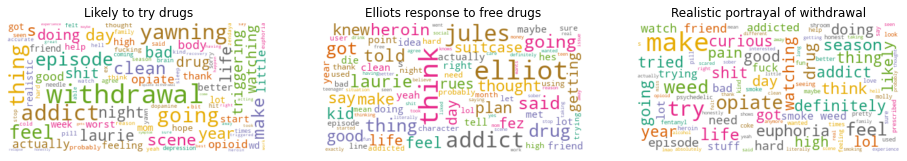

In [98]:
# subplot for each post

plt.rcParams['figure.figsize'] = (16, 6)
titles = ['Likely to try drugs', 'Elliots response to free drugs', 'Realistic portrayal of withdrawal']

# create subplots
for i, post in enumerate(data_stop.index):
    wc.generate(corpus.body[post])
    plt.subplot(1,3,i+1)
    plt.title(titles[i])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')

#### 2.2 Vocabulary

In [99]:
data.head()

,aa,aana,ab,aback,abby,abhorrence,ability,able,abroad,absolute,...,zealand,zendaya,zendayas,zero,zoloft,zombie,zone,zoo,zooming,zs
A,1,0,0,0,1,0,0,9,0,4,...,1,8,1,0,0,0,1,0,1,1
B,2,1,1,1,0,0,2,6,0,0,...,0,2,0,1,0,1,0,0,0,0
C,3,0,1,0,0,1,0,14,1,4,...,0,4,0,3,1,1,1,1,0,0


In [100]:
# number of unique words

# identify the non-zero items in the TDM
unique_ls = []
for i, post in enumerate(data.index):
    unique = data.loc[post].to_numpy().nonzero()[0].size
    unique_ls.append(unique)
    
# new df with number of unique words
data_words = pd.DataFrame(list(zip(titles, unique_ls)), columns=['post', 'unique_words'])
data_unique_words = data_words.sort_values('unique_words', ascending=False)
data_unique_words

,post,unique_words
2,Realistic portrayal of withdrawal,3347
1,Elliots response to free drugs,2461
0,Likely to try drugs,1675


**Looking at the frequency of certain drug related words**

In [101]:
Counter(words).most_common()

[('like', 3),
 ('just', 3),
 ('rue', 3),
 ('did', 3),
 ('really', 3),
 ('people', 3),
 ('way', 3),
 ('know', 3),
 ('use', 3),
 ('time', 3),
 ('drugs', 3),
 ('want', 3),
 ('does', 3),
 ('addiction', 3),
 ('addict', 2),
 ('going', 2),
 ('feel', 2),
 ('life', 2),
 ('laurie', 2),
 ('think', 2),
 ('drug', 2),
 ('withdrawal', 1),
 ('yawning', 1),
 ('episode', 1),
 ('clean', 1),
 ('withdrawals', 1),
 ('thing', 1),
 ('bad', 1),
 ('shit', 1),
 ('doing', 1),
 ('triggering', 1),
 ('things', 1),
 ('elliot', 1),
 ('jules', 1),
 ('got', 1),
 ('said', 1),
 ('told', 1),
 ('heroin', 1),
 ('good', 1),
 ('knew', 1),
 ('plan', 1),
 ('rues', 1),
 ('thought', 1),
 ('weed', 1),
 ('makes', 1),
 ('try', 1),
 ('opiates', 1),
 ('season', 1),
 ('watching', 1),
 ('euphoria', 1),
 ('make', 1),
 ('high', 1),
 ('definitely', 1),
 ('pain', 1),
 ('tried', 1)]

In [129]:
# isolate drug words
drug_words = ['drug', 'drugs', 'addict', 'addiction', 'opiate', 'opioids', 'dope', 'marijuana'
                   'weed', 'zoloft', 'xanax', 'high', 'dose', 'trigger', 'triggering', 'relapse', 'sober', 'sobriety','fentanyl',
                   'heroin', 'crack', 'cocaine', 'amphetamine', 'speed', 'acid', 'ecstasy', 'lsd', 'shrooms',
                   'psychadelics', 'narcotic', 'rehab', 'recovery', 'treatment', 'methadone', 'naloxone']

# filter data if any column is in drug_words
filter_ls = [data_stop.columns[i] in drug_words for i in range(len(data_stop.columns))]
drug_cols = data_stop[data_stop.columns[filter_ls]]
# arrange columns by values
drug_cols = drug_cols.sort_values(by=drug_cols.columns[0], ascending=False)
drug_cols

,acid,addict,amphetamine,cocaine,crack,dope,dose,drug,ecstasy,fentanyl,...,rehab,relapse,shrooms,sober,sobriety,treatment,trigger,triggering,xanax,zoloft
post,,,,,,,,,,,,,,,,,,,,,
sqhl33,14,60,1,10,5,4,11,90,1,41,...,7,10,32,30,4,3,7,18,12,1
sn2vpk,2,70,0,4,1,3,2,64,0,12,...,6,1,0,15,8,0,1,0,1,0
smur2x,0,33,0,1,0,2,1,16,0,4,...,2,5,0,6,7,3,3,17,1,0


In [130]:
drug_cols_t = drug_cols.T

In [131]:
# scatterplot of drug words for each post
from matplotlib import pyplot as plt

# scatterplot of 'tiggering' and 'sober'
plt.scatter(drug_cols_t['triggering'], drug_cols_t['sober'])
plt.xlabel('triggering')
plt.ylabel('sober')
plt.show()


KeyError: 'triggering'